In [50]:
# to handle datasets
import pandas as pd
import numpy as np

# for plotting
import matplotlib.pyplot as plt
%matplotlib inline

# to divide train and test set
from sklearn.model_selection import train_test_split

# feature scaling
from sklearn.preprocessing import MinMaxScaler

# to visualise al the columns in the dataframe
pd.pandas.set_option('display.max_columns', None)

from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

from sklearn.metrics import mean_squared_error
from math import sqrt

from sklearn.externals import joblib

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [2]:
data = pd.read_csv('train.csv')
print(data.shape)
data.head()

(1460, 81)


Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [3]:
X_train, X_test, y_train, y_test = train_test_split(data, data.SalePrice,
                                                    test_size=0.1,
                                                    random_state=0)

In [4]:
X_train.shape, X_test.shape

((1314, 81), (146, 81))

In [5]:
vars_with_na = [var for var in data.columns if X_train[var].isnull().sum()>1 and X_train[var].dtypes=='O']

# print the variable name and the percentage of missing values
for var in vars_with_na:
    print(var, np.round(X_train[var].isnull().mean(), 3),  ' % missing values')

Alley 0.938  % missing values
MasVnrType 0.005  % missing values
BsmtQual 0.024  % missing values
BsmtCond 0.024  % missing values
BsmtExposure 0.025  % missing values
BsmtFinType1 0.024  % missing values
BsmtFinType2 0.025  % missing values
FireplaceQu 0.473  % missing values
GarageType 0.056  % missing values
GarageFinish 0.056  % missing values
GarageQual 0.056  % missing values
GarageCond 0.056  % missing values
PoolQC 0.995  % missing values
Fence 0.814  % missing values
MiscFeature 0.961  % missing values


In [6]:
def fill_categorical_na(df, var_list):
    X = df.copy()
    X[var_list] = df[var_list].fillna('Missing')
    return X

In [7]:
X_train = fill_categorical_na(X_train, vars_with_na)
X_test = fill_categorical_na(X_test, vars_with_na)

# check that we have no missing information in the engineered variables
X_train[vars_with_na].isnull().sum()

Alley           0
MasVnrType      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
FireplaceQu     0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
PoolQC          0
Fence           0
MiscFeature     0
dtype: int64

In [8]:
[vr for var in vars_with_na if X_train[var].isnull().sum()>0]

[]

In [9]:
vars_with_na = [var for var in data.columns if X_train[var].isnull().sum()>1 and X_train[var].dtypes!='O']

# print the variable name and the percentage of missing values
for var in vars_with_na:
    print(var, np.round(X_train[var].isnull().mean(), 3),  ' % missing values')

LotFrontage 0.177  % missing values
MasVnrArea 0.005  % missing values
GarageYrBlt 0.056  % missing values


In [10]:
for var in vars_with_na:
    
    # calculate the mode
    mode_val = X_train[var].mode()[0]
    
    # train
    X_train[var+'_na'] = np.where(X_train[var].isnull(), 1, 0)
    X_train[var].fillna(mode_val, inplace=True)
    
    # test
    X_test[var+'_na'] = np.where(X_test[var].isnull(), 1, 0)
    X_test[var].fillna(mode_val, inplace=True)

# check that we have no more missing values in the engineered variables
X_train[vars_with_na].isnull().sum()

LotFrontage    0
MasVnrArea     0
GarageYrBlt    0
dtype: int64

In [11]:
X_train[['LotFrontage_na', 'MasVnrArea_na', 'GarageYrBlt_na']].head()

LotFrontage_na  MasVnrArea_na  GarageYrBlt_na
930                0              0               0
656                0              0               0
45                 0              0               0
1348               1              0               0
55                 0              0               0

In [12]:
[vr for var in vars_with_na if X_test[var].isnull().sum()>0]

[]

In [13]:
def elapsed_years(df, var):
    # capture difference between year variable and year the house was sold
    df[var] = df['YrSold'] - df[var]
    return df

In [14]:
for var in ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt']:
    X_train = elapsed_years(X_train, var)
    X_test = elapsed_years(X_test, var)

In [15]:
[vr for var in ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt'] if X_test[var].isnull().sum()>0]

[]

In [16]:
for var in ['LotFrontage', 'LotArea', '1stFlrSF', 'GrLivArea', 'SalePrice']:
    X_train[var] = np.log(X_train[var])
    X_test[var]= np.log(X_test[var])

In [17]:
[var for var in ['LotFrontage', 'LotArea', '1stFlrSF', 'GrLivArea', 'SalePrice'] if X_test[var].isnull().sum()>0]

[]

In [18]:
[var for var in ['LotFrontage', 'LotArea', '1stFlrSF', 'GrLivArea', 'SalePrice'] if X_train[var].isnull().sum()>0]

[]

In [19]:
cat_vars = [var for var in X_train.columns if X_train[var].dtype == 'O']

In [20]:
def find_frequent_labels(df, var, rare_perc):
    # finds the labels that are shared by more than a certain % of the houses in the dataset
    df = df.copy()
    tmp = df.groupby(var)['SalePrice'].count() / len(df)
    return tmp[tmp>rare_perc].index

for var in cat_vars:
    frequent_ls = find_frequent_labels(X_train, var, 0.01)
    X_train[var] = np.where(X_train[var].isin(frequent_ls), X_train[var], 'Rare')
    X_test[var] = np.where(X_test[var].isin(frequent_ls), X_test[var], 'Rare')

In [21]:
def replace_categories(train, test, var, target):
    ordered_labels = train.groupby([var])[target].mean().sort_values().index
    ordinal_label = {k:i for i, k in enumerate(ordered_labels, 0)} 
    train[var] = train[var].map(ordinal_label)
    test[var] = test[var].map(ordinal_label)

In [22]:
for var in cat_vars:
    replace_categories(X_train, X_test, var, 'SalePrice')

In [23]:
[var for var in X_train.columns if X_train[var].isnull().sum()>0]

[]

In [24]:
[var for var in X_test.columns if X_test[var].isnull().sum()>0]

[]

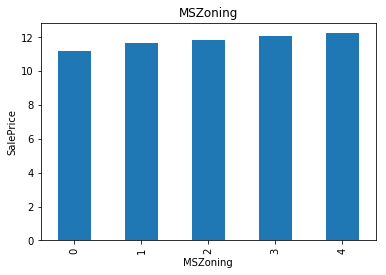

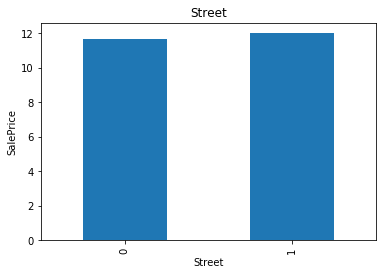

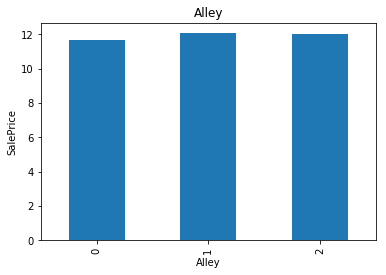

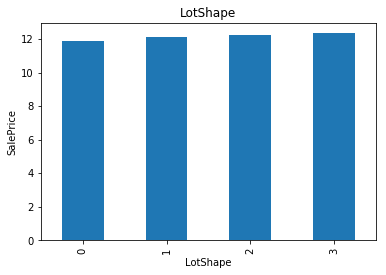

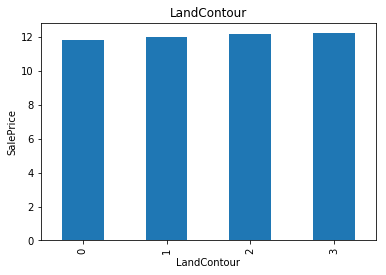

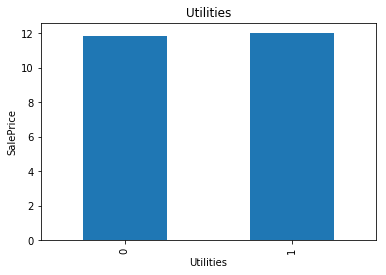

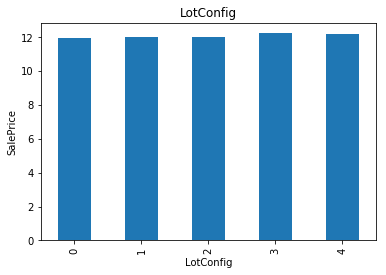

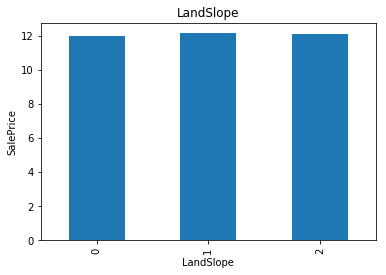

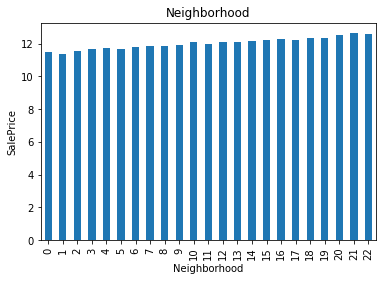

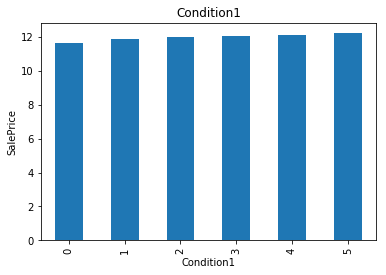

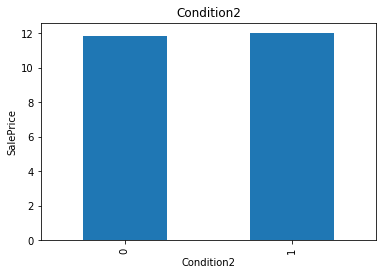

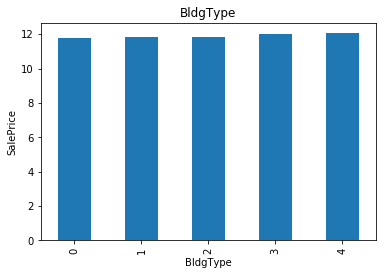

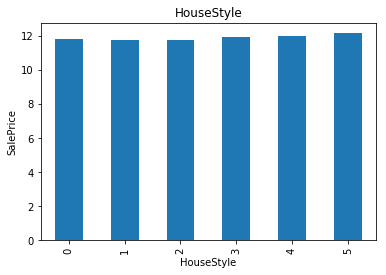

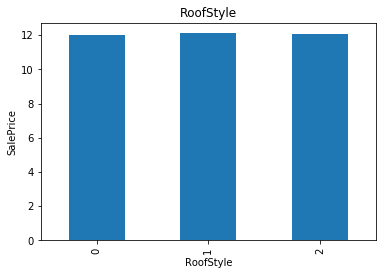

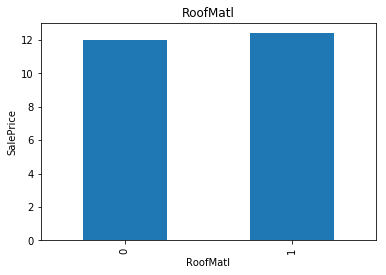

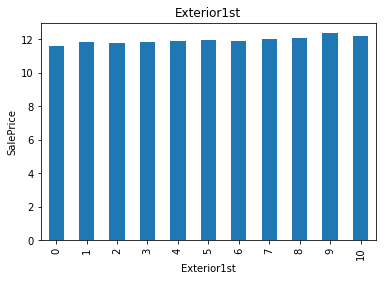

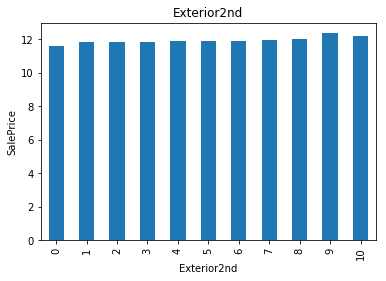

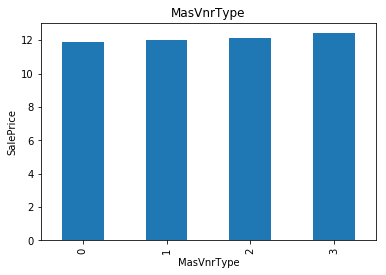

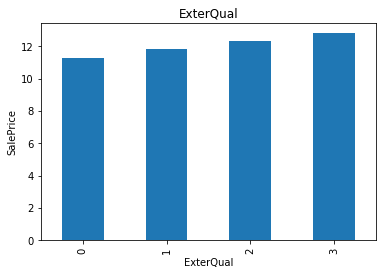

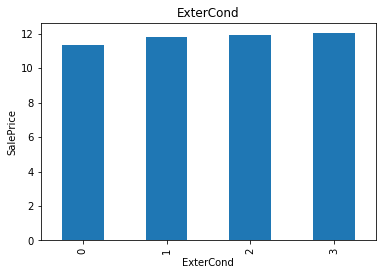

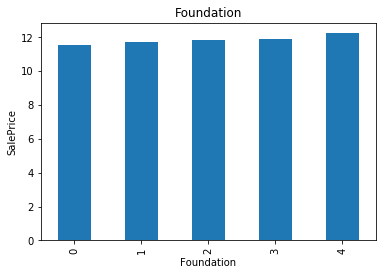

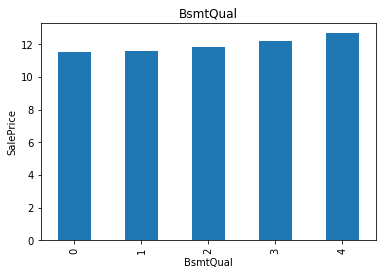

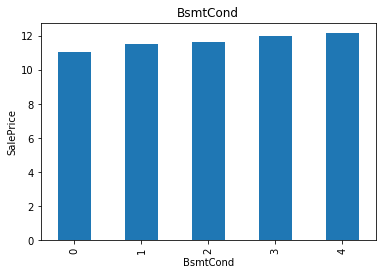

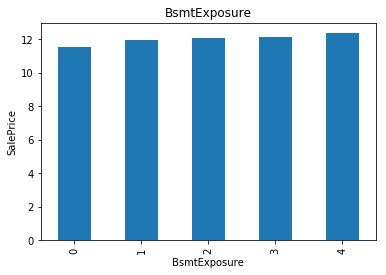

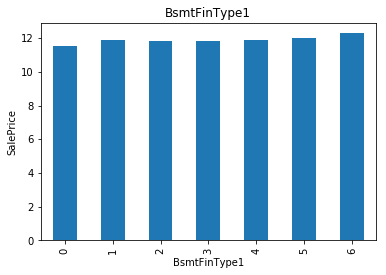

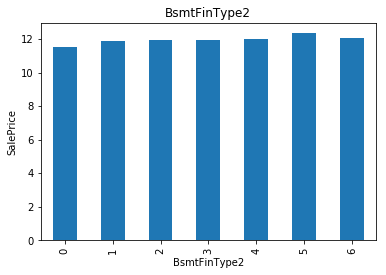

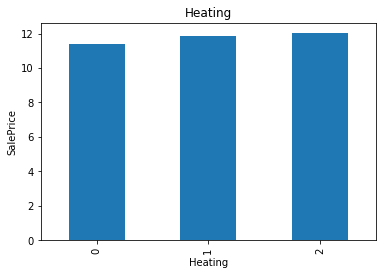

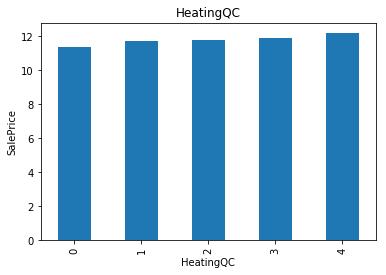

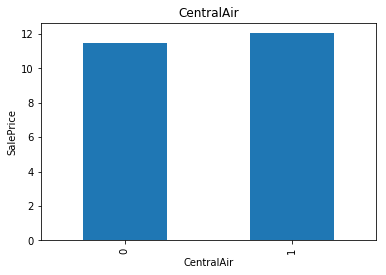

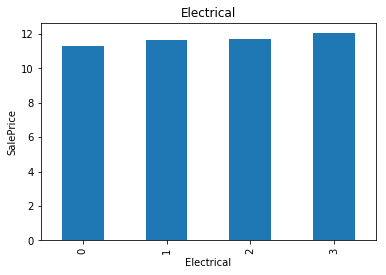

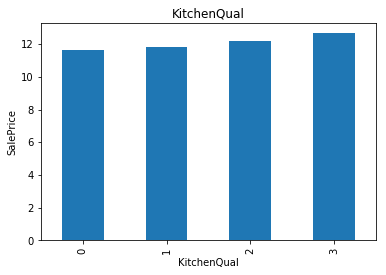

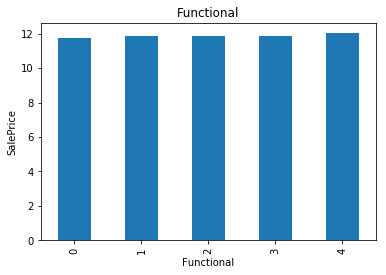

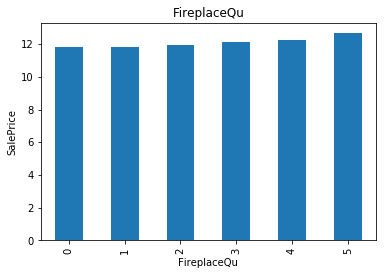

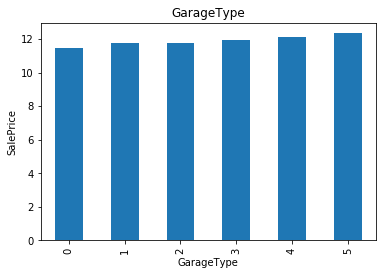

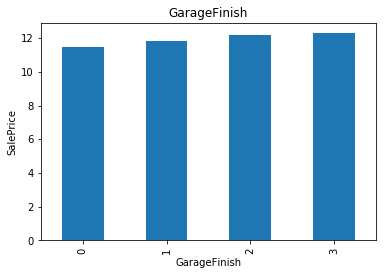

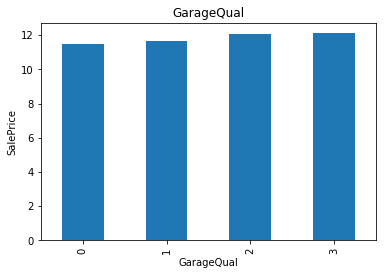

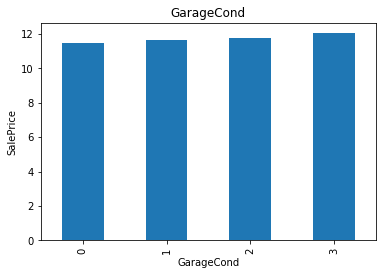

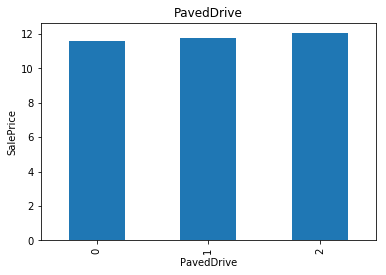

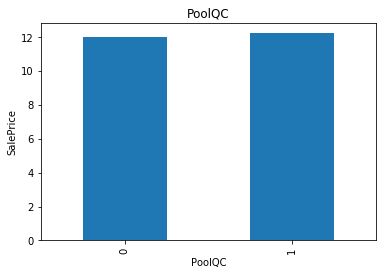

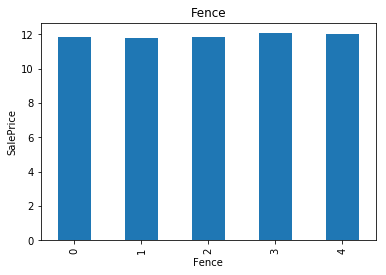

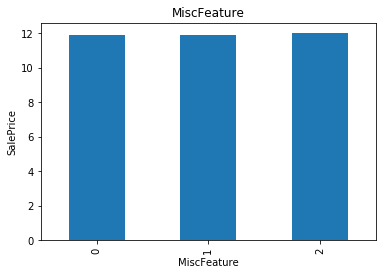

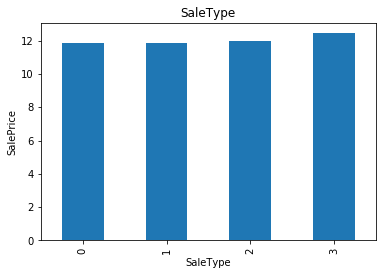

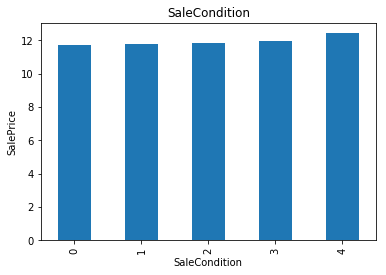

In [25]:
def analyse_vars(df, var):
    df = df.copy()
    df.groupby(var)['SalePrice'].median().plot.bar()
    plt.title(var)
    plt.ylabel('SalePrice')
    plt.show()
    
for var in cat_vars:
    analyse_vars(X_train, var)

In [26]:
train_vars = [var for var in X_train.columns if var not in ['Id', 'SalePrice']]
len(train_vars)

82

In [27]:
X_train[['Id', 'SalePrice']].reset_index(drop=True)

Id  SalePrice
0      931  12.211060
1      657  11.887931
2       46  12.675764
3     1349  12.278393
4       56  12.103486
5     1229  12.813918
6      964  12.384219
7      922  11.890677
8      459  11.989160
9     1387  12.429216
10     480  11.401670
11    1245  12.345835
12     614  11.898188
13    1125  12.007012
14     224  11.482466
15    1234  11.863582
16     990  12.190959
17     714  11.767568
18    1003  12.354493
19     109  11.652687
20     744  12.072541
21     518  12.487485
22     334  12.240474
23    1109  12.106252
24     261  12.078239
25     796  12.049419
26    1043  12.185870
27     696  12.078239
28     423  11.635143
29     575  11.842229
...    ...        ...
1284  1436  12.066811
1285  1202  12.195517
1286   100  11.767180
1287   851  11.786762
1288   449  11.691072
1289   756  12.058153
1290   977  11.356272
1291   116  12.078239
1292   778  11.867097
1293    73  12.128111
1294   846  12.049419
1295   538  11.619535
1296   850  12.138864
1297   175  12.122691
1298    88  12.010666
1299   552  11.630709
1300   706  10.915088
1301   315  12.089539
1302  1421  12.100156
1303   601  12.524526
1304  1095  11.767568
1305   600  11.925035
1306   278  11.856515
1307  1034  12.345835
1308  1384  11.626254
1309   764  12.727838
1310   836  11.759786
1311  1217  11.626254
1312   560  12.363076
1313   685  12.305918

[1314 rows x 2 columns]

In [28]:
scaler = MinMaxScaler() # create an instance
scaler.fit(X_train[train_vars]) #  fit  the scaler to the train set for later use

# transform the train and test set, and add on the Id and SalePrice variables
X_train = pd.concat([X_train[['Id', 'SalePrice']].reset_index(drop=True),
                    pd.DataFrame(scaler.transform(X_train[train_vars]), columns=train_vars)],
                    axis=1)

X_test = pd.concat([X_test[['Id', 'SalePrice']].reset_index(drop=True),
                    pd.DataFrame(scaler.transform(X_test[train_vars]), columns=train_vars)],
                    axis=1)

In [29]:
X_train.head()

Id  SalePrice  MSSubClass  MSZoning  LotFrontage   LotArea  Street  \
0   931  12.211060    0.000000      0.75     0.461171  0.377048     1.0   
1   657  11.887931    0.000000      0.75     0.456066  0.399443     1.0   
2    46  12.675764    0.588235      0.75     0.394699  0.347082     1.0   
3  1349  12.278393    0.000000      0.75     0.388581  0.493677     1.0   
4    56  12.103486    0.000000      0.75     0.577658  0.402702     1.0   

   Alley  LotShape  LandContour  Utilities  LotConfig  LandSlope  \
0    1.0  0.333333     1.000000        1.0        0.0        0.0   
1    1.0  0.333333     0.333333        1.0        0.0        0.0   
2    1.0  0.000000     0.333333        1.0        0.0        0.0   
3    1.0  0.666667     0.666667        1.0        0.0        0.0   
4    1.0  0.333333     0.333333        1.0        0.0        0.0   

   Neighborhood  Condition1  Condition2  BldgType  HouseStyle  OverallQual  \
0      0.863636         0.4         1.0      0.75         0.6     0.777778   
1      0.363636         0.4         1.0      0.75         0.6     0.444444   
2      0.954545         0.4         1.0      1.00         0.6     0.888889   
3      0.454545         0.4         1.0      0.75         0.6     0.666667   
4      0.363636         0.4         1.0      0.75         0.6     0.555556   

   OverallCond  YearBuilt  YearRemodAdd  RoofStyle  RoofMatl  Exterior1st  \
0         0.50   0.014706      0.049180        0.0       0.0          1.0   
1         0.75   0.360294      0.049180        0.0       0.0          0.6   
2         0.50   0.036765      0.098361        1.0       0.0          0.3   
3         0.50   0.066176      0.163934        0.0       0.0          1.0   
4         0.50   0.323529      0.737705        0.0       0.0          0.6   

   Exterior2nd  MasVnrType  MasVnrArea  ExterQual  ExterCond  Foundation  \
0          1.0    0.000000     0.00000   0.666667        1.0         1.0   
1          0.6    0.666667     0.03375   0.666667        1.0         0.5   
2          0.2    0.666667     0.25750   1.000000        1.0         1.0   
3          1.0    0.000000     0.00000   0.666667        1.0         1.0   
4          0.7    0.666667     0.17000   0.333333        1.0         0.5   

   BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinType2  \
0      0.75      0.75          0.75      1.000000    0.002835      0.666667   
1      0.50      0.75          0.25      0.666667    0.142807      0.666667   
2      1.00      0.75          0.25      1.000000    0.080794      0.666667   
3      0.75      0.75          1.00      1.000000    0.255670      0.666667   
4      0.50      0.75          0.25      0.333333    0.086818      0.666667   

   BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  Heating  HeatingQC  CentralAir  \
0         0.0   0.673479     0.239935      1.0       1.00         1.0   
1         0.0   0.114724     0.172340      1.0       1.00         1.0   
2         0.0   0.601951     0.286743      1.0       1.00         1.0   
3         0.0   0.018114     0.242553      1.0       1.00         1.0   
4         0.0   0.434278     0.233224      1.0       0.75         1.0   

   Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  \
0         1.0  0.559760       0.0           0.0   0.523250      0.000000   
1         1.0  0.434539       0.0           0.0   0.406196      0.333333   
2         1.0  0.627205       0.0           0.0   0.586296      0.333333   
3         1.0  0.566920       0.0           0.0   0.529943      0.333333   
4         1.0  0.549026       0.0           0.0   0.513216      0.000000   

   BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  \
0           0.0  0.666667       0.0         0.375      0.333333     0.666667   
1           0.0  0.333333       0.5         0.375      0.333333     0.666667   
2           0.0  0.666667       0.0         0.250      0.333333     1.000000   
3           0.0  0.666667       0.0         0.375      0.333333  

In [30]:
X_train.isnull().sum()

Id                0
SalePrice         0
MSSubClass        0
MSZoning          0
LotFrontage       0
LotArea           0
Street            0
Alley             0
LotShape          0
LandContour       0
Utilities         0
LotConfig         0
LandSlope         0
Neighborhood      0
Condition1        0
Condition2        0
BldgType          0
HouseStyle        0
OverallQual       0
OverallCond       0
YearBuilt         0
YearRemodAdd      0
RoofStyle         0
RoofMatl          0
Exterior1st       0
Exterior2nd       0
MasVnrType        0
MasVnrArea        0
ExterQual         0
ExterCond         0
                 ..
KitchenQual       0
TotRmsAbvGrd      0
Functional        0
Fireplaces        0
FireplaceQu       0
GarageType        0
GarageYrBlt       0
GarageFinish      0
GarageCars        0
GarageArea        0
GarageQual        0
GarageCond        0
PavedDrive        0
WoodDeckSF        0
OpenPorchSF       0
EnclosedPorch     0
3SsnPorch         0
ScreenPorch       0
PoolArea          0


In [31]:
X_train.to_csv('xtrain.csv', index=False)
X_test.to_csv('xtest.csv', index=False)

In [32]:
X_train.head()

Id  SalePrice  MSSubClass  MSZoning  LotFrontage   LotArea  Street  \
0   931  12.211060    0.000000      0.75     0.461171  0.377048     1.0   
1   657  11.887931    0.000000      0.75     0.456066  0.399443     1.0   
2    46  12.675764    0.588235      0.75     0.394699  0.347082     1.0   
3  1349  12.278393    0.000000      0.75     0.388581  0.493677     1.0   
4    56  12.103486    0.000000      0.75     0.577658  0.402702     1.0   

   Alley  LotShape  LandContour  Utilities  LotConfig  LandSlope  \
0    1.0  0.333333     1.000000        1.0        0.0        0.0   
1    1.0  0.333333     0.333333        1.0        0.0        0.0   
2    1.0  0.000000     0.333333        1.0        0.0        0.0   
3    1.0  0.666667     0.666667        1.0        0.0        0.0   
4    1.0  0.333333     0.333333        1.0        0.0        0.0   

   Neighborhood  Condition1  Condition2  BldgType  HouseStyle  OverallQual  \
0      0.863636         0.4         1.0      0.75         0.6     0.777778   
1      0.363636         0.4         1.0      0.75         0.6     0.444444   
2      0.954545         0.4         1.0      1.00         0.6     0.888889   
3      0.454545         0.4         1.0      0.75         0.6     0.666667   
4      0.363636         0.4         1.0      0.75         0.6     0.555556   

   OverallCond  YearBuilt  YearRemodAdd  RoofStyle  RoofMatl  Exterior1st  \
0         0.50   0.014706      0.049180        0.0       0.0          1.0   
1         0.75   0.360294      0.049180        0.0       0.0          0.6   
2         0.50   0.036765      0.098361        1.0       0.0          0.3   
3         0.50   0.066176      0.163934        0.0       0.0          1.0   
4         0.50   0.323529      0.737705        0.0       0.0          0.6   

   Exterior2nd  MasVnrType  MasVnrArea  ExterQual  ExterCond  Foundation  \
0          1.0    0.000000     0.00000   0.666667        1.0         1.0   
1          0.6    0.666667     0.03375   0.666667        1.0         0.5   
2          0.2    0.666667     0.25750   1.000000        1.0         1.0   
3          1.0    0.000000     0.00000   0.666667        1.0         1.0   
4          0.7    0.666667     0.17000   0.333333        1.0         0.5   

   BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinType2  \
0      0.75      0.75          0.75      1.000000    0.002835      0.666667   
1      0.50      0.75          0.25      0.666667    0.142807      0.666667   
2      1.00      0.75          0.25      1.000000    0.080794      0.666667   
3      0.75      0.75          1.00      1.000000    0.255670      0.666667   
4      0.50      0.75          0.25      0.333333    0.086818      0.666667   

   BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  Heating  HeatingQC  CentralAir  \
0         0.0   0.673479     0.239935      1.0       1.00         1.0   
1         0.0   0.114724     0.172340      1.0       1.00         1.0   
2         0.0   0.601951     0.286743      1.0       1.00         1.0   
3         0.0   0.018114     0.242553      1.0       1.00         1.0   
4         0.0   0.434278     0.233224      1.0       0.75         1.0   

   Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  \
0         1.0  0.559760       0.0           0.0   0.523250      0.000000   
1         1.0  0.434539       0.0           0.0   0.406196      0.333333   
2         1.0  0.627205       0.0           0.0   0.586296      0.333333   
3         1.0  0.566920       0.0           0.0   0.529943      0.333333   
4         1.0  0.549026       0.0           0.0   0.513216      0.000000   

   BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  \
0           0.0  0.666667       0.0         0.375      0.333333     0.666667   
1           0.0  0.333333       0.5         0.375      0.333333     0.666667   
2           0.0  0.666667       0.0         0.250      0.333333     1.000000   
3           0.0  0.666667       0.0         0.375      0.333333  

In [33]:
y_train = X_train['SalePrice']
y_test = X_test['SalePrice']

# drop unnecessary variables from our training and testing sets
X_train.drop(['Id', 'SalePrice'], axis=1, inplace=True)
X_test.drop(['Id', 'SalePrice'], axis=1, inplace=True)

In [34]:
sel_ = SelectFromModel(Lasso(alpha=0.005, random_state=0)) # remember to set the seed, the random state in this function
sel_.fit(X_train, y_train)

SelectFromModel(estimator=Lasso(alpha=0.005, copy_X=True, fit_intercept=True,
                                max_iter=1000, normalize=False, positive=False,
                                precompute=False, random_state=0,
                                selection='cyclic', tol=0.0001,
                                warm_start=False),
                max_features=None, norm_order=1, prefit=False, threshold=None)

In [35]:
sel_.get_support()

array([ True,  True, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False,  True,  True,
       False,  True,  True, False, False, False,  True, False, False,
       False, False,  True, False,  True, False, False, False, False,
       False, False, False,  True,  True, False,  True, False, False,
        True,  True, False, False, False, False, False,  True, False,
       False,  True,  True,  True, False,  True,  True, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False])

In [36]:
selected_feat = X_train.columns[(sel_.get_support())]

print('total features: {}'.format((X_train.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
print('features with coefficients shrank to zero: {}'.format(
    np.sum(sel_.estimator_.coef_ == 0)))

total features: 82
selected features: 22
features with coefficients shrank to zero: 60


In [37]:
selected_feat

Index(['MSSubClass', 'MSZoning', 'Neighborhood', 'OverallQual', 'OverallCond',
       'YearRemodAdd', 'RoofStyle', 'MasVnrType', 'BsmtQual', 'BsmtExposure',
       'HeatingQC', 'CentralAir', '1stFlrSF', 'GrLivArea', 'BsmtFullBath',
       'KitchenQual', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageCars', 'PavedDrive'],
      dtype='object')

In [38]:
selected_feats = X_train.columns[(sel_.estimator_.coef_ != 0).ravel().tolist()]
selected_feats

Index(['MSSubClass', 'MSZoning', 'Neighborhood', 'OverallQual', 'OverallCond',
       'YearRemodAdd', 'RoofStyle', 'MasVnrType', 'BsmtQual', 'BsmtExposure',
       'HeatingQC', 'CentralAir', '1stFlrSF', 'GrLivArea', 'BsmtFullBath',
       'KitchenQual', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageCars', 'PavedDrive'],
      dtype='object')

In [39]:
pd.Series(selected_feats).to_csv('selected_features.csv', index=False)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.


In [41]:
X_train = pd.read_csv('xtrain.csv')
X_test = pd.read_csv('xtest.csv')

X_train.head()

Id  SalePrice  MSSubClass  MSZoning  LotFrontage   LotArea  Street  \
0   931  12.211060    0.000000      0.75     0.461171  0.377048     1.0   
1   657  11.887931    0.000000      0.75     0.456066  0.399443     1.0   
2    46  12.675764    0.588235      0.75     0.394699  0.347082     1.0   
3  1349  12.278393    0.000000      0.75     0.388581  0.493677     1.0   
4    56  12.103486    0.000000      0.75     0.577658  0.402702     1.0   

   Alley  LotShape  LandContour  Utilities  LotConfig  LandSlope  \
0    1.0  0.333333     1.000000        1.0        0.0        0.0   
1    1.0  0.333333     0.333333        1.0        0.0        0.0   
2    1.0  0.000000     0.333333        1.0        0.0        0.0   
3    1.0  0.666667     0.666667        1.0        0.0        0.0   
4    1.0  0.333333     0.333333        1.0        0.0        0.0   

   Neighborhood  Condition1  Condition2  BldgType  HouseStyle  OverallQual  \
0      0.863636         0.4         1.0      0.75         0.6     0.777778   
1      0.363636         0.4         1.0      0.75         0.6     0.444444   
2      0.954545         0.4         1.0      1.00         0.6     0.888889   
3      0.454545         0.4         1.0      0.75         0.6     0.666667   
4      0.363636         0.4         1.0      0.75         0.6     0.555556   

   OverallCond  YearBuilt  YearRemodAdd  RoofStyle  RoofMatl  Exterior1st  \
0         0.50   0.014706      0.049180        0.0       0.0          1.0   
1         0.75   0.360294      0.049180        0.0       0.0          0.6   
2         0.50   0.036765      0.098361        1.0       0.0          0.3   
3         0.50   0.066176      0.163934        0.0       0.0          1.0   
4         0.50   0.323529      0.737705        0.0       0.0          0.6   

   Exterior2nd  MasVnrType  MasVnrArea  ExterQual  ExterCond  Foundation  \
0          1.0    0.000000     0.00000   0.666667        1.0         1.0   
1          0.6    0.666667     0.03375   0.666667        1.0         0.5   
2          0.2    0.666667     0.25750   1.000000        1.0         1.0   
3          1.0    0.000000     0.00000   0.666667        1.0         1.0   
4          0.7    0.666667     0.17000   0.333333        1.0         0.5   

   BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinType2  \
0      0.75      0.75          0.75      1.000000    0.002835      0.666667   
1      0.50      0.75          0.25      0.666667    0.142807      0.666667   
2      1.00      0.75          0.25      1.000000    0.080794      0.666667   
3      0.75      0.75          1.00      1.000000    0.255670      0.666667   
4      0.50      0.75          0.25      0.333333    0.086818      0.666667   

   BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  Heating  HeatingQC  CentralAir  \
0         0.0   0.673479     0.239935      1.0       1.00         1.0   
1         0.0   0.114724     0.172340      1.0       1.00         1.0   
2         0.0   0.601951     0.286743      1.0       1.00         1.0   
3         0.0   0.018114     0.242553      1.0       1.00         1.0   
4         0.0   0.434278     0.233224      1.0       0.75         1.0   

   Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  \
0         1.0  0.559760       0.0           0.0   0.523250      0.000000   
1         1.0  0.434539       0.0           0.0   0.406196      0.333333   
2         1.0  0.627205       0.0           0.0   0.586296      0.333333   
3         1.0  0.566920       0.0           0.0   0.529943      0.333333   
4         1.0  0.549026       0.0           0.0   0.513216      0.000000   

   BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  \
0           0.0  0.666667       0.0         0.375      0.333333     0.666667   
1           0.0  0.333333       0.5         0.375      0.333333     0.666667   
2           0.0  0.666667       0.0         0.250      0.333333     1.000000   
3           0.0  0.666667       0.0         0.375      0.333333  

In [42]:
y_train = X_train['SalePrice']
y_test = X_test['SalePrice']

In [43]:
features = pd.read_csv('selected_features.csv', header=None)
features = [x for x in features[0]] 

# here I will add this last feature, even though it was not selected in our previous step,
# because it needs key feature engineering steps that I want to discuss further during the deployment
# part of the course. 

features = features + ['LotFrontage'] 

features

['MSSubClass',
 'MSZoning',
 'Neighborhood',
 'OverallQual',
 'OverallCond',
 'YearRemodAdd',
 'RoofStyle',
 'MasVnrType',
 'BsmtQual',
 'BsmtExposure',
 'HeatingQC',
 'CentralAir',
 '1stFlrSF',
 'GrLivArea',
 'BsmtFullBath',
 'KitchenQual',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageCars',
 'PavedDrive',
 'LotFrontage']

In [44]:
X_train = X_train[features]
X_test = X_test[features]

In [45]:
lin_model = Lasso(alpha=0.005, random_state=0) # remember to set the random_state / seed
lin_model.fit(X_train, y_train)

Lasso(alpha=0.005, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=0,
      selection='cyclic', tol=0.0001, warm_start=False)

In [46]:
pred = lin_model.predict(X_train)
print('linear train mse: {}'.format(mean_squared_error(np.exp(y_train), np.exp(pred))))
print('linear train rmse: {}'.format(sqrt(mean_squared_error(np.exp(y_train), np.exp(pred)))))
print()
pred = lin_model.predict(X_test)
print('linear test mse: {}'.format(mean_squared_error(np.exp(y_test), np.exp(pred))))
print('linear test rmse: {}'.format(sqrt(mean_squared_error(np.exp(y_test), np.exp(pred)))))
print()
print('Average house price: ', np.exp(y_train).median())

linear train mse: 1087435415.4414546
linear train rmse: 32976.285652593666

linear test mse: 1405259552.2596035
linear test rmse: 37486.79170400694

Average house price:  163000.00000000012


Text(0.5, 1.0, 'Evaluation of Lasso Predictions')

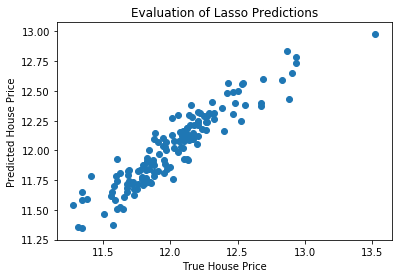

In [47]:
plt.scatter(y_test, lin_model.predict(X_test))
plt.xlabel('True House Price')
plt.ylabel('Predicted House Price')
plt.title('Evaluation of Lasso Predictions')

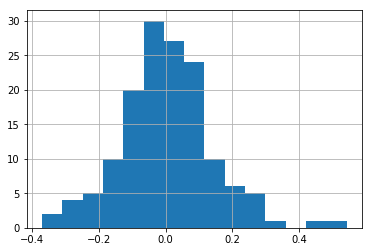

In [48]:
errors = y_test - lin_model.predict(X_test)
errors.hist(bins=15)

Text(0.5, 1.0, 'Feature Importance')

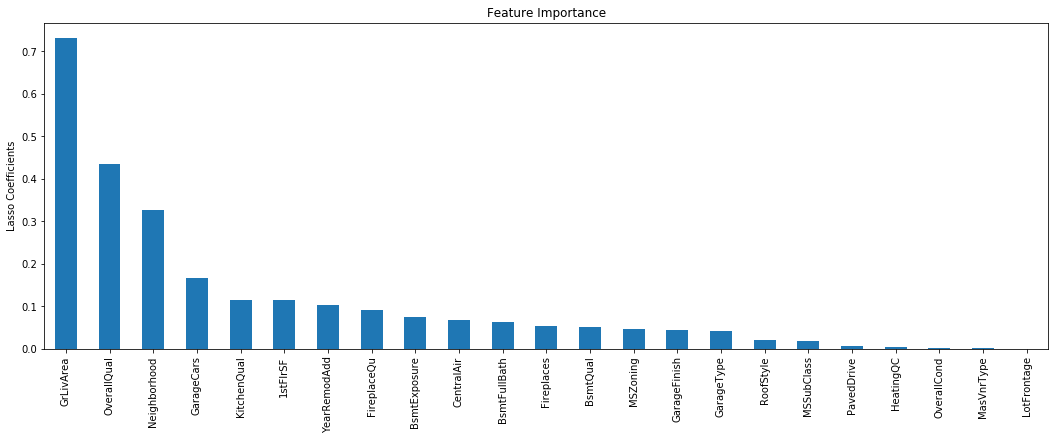

In [49]:
importance = pd.Series(np.abs(lin_model.coef_.ravel()))
importance.index = features
importance.sort_values(inplace=True, ascending=False)
importance.plot.bar(figsize=(18,6))
plt.ylabel('Lasso Coefficients')
plt.title('Feature Importance')